In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.express as px
from scipy import stats
import math

In [2]:
aire_sin = pd.read_csv("../CSV_limpios/aire.csv")
crimen_sin = pd.read_csv("../CSV_limpios/crimen.csv")

aire_all = pd.read_csv("../CSV_limpios/aire_v2.csv")
crimen_all = pd.read_csv("../CSV_limpios/crimen_v2.csv")

crimen_o3 = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
aire_o3 = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

In [3]:
#df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
#df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_all = pd.DataFrame()
df_all['ID'] = aire_o3['ID']
df_all['Dia'] = aire_o3['Dia']
df_all['Mes'] = aire_o3['Mes']
df_all['Anio'] = aire_o3['Anio']
df_all['Alcaldia'] = aire_o3['Alcaldia']
df_all['Latitud'] = aire_o3['Latitud']
df_all['Longitud'] = aire_o3['Longitud']
df_all['Crimenes'] = crimen_o3['countCrimenes']
df_all['AQI'] = aire_o3['avgAQI']
df_all

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI
0,1_1_2016_ALVAR,1,1,2016,ALVARO OBREGON,19.325146,-99.204140,5,53
1,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.468405,-99.169792,4,207
2,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.370464,-99.159599,4,184
3,1_1_2016_COYOA,1,1,2016,COYOACAN,19.304441,-99.103630,6,43
4,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.365313,-99.291702,5,171
...,...,...,...,...,...,...,...,...,...
22438,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.345610,-99.009384,15,25
22439,31_12_2020_MIGUE,31,12,2020,MIGUEL HIDALGO,19.404051,-99.202660,3,20
22440,31_12_2020_TLAHU,31,12,2020,TLAHUAC,19.246458,-99.010567,3,35
22441,31_12_2020_TLALP,31,12,2020,TLALPAN,19.154285,-99.162613,4,27


In [11]:
df_all['Alcaldia'].unique()

array(['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
       'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO',
       'IZTACALCO', 'IZTAPALAPA', 'MIGUEL HIDALGO', 'TLAHUAC', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'MILPA ALTA'], dtype=object)

In [4]:
alc_mapper = {"BENITO JUAREZ": 1,
              "VENUSTIANO CARRANZA": 2,
              "IZTACALCO": 3,
              "TLALPAN": 4,
              "CUAJIMALPA DE MORELOS": 5,
              "TLAHUAC": 6,
              "AZCAPOTZALCO": 7,
              "CUAUHTEMOC": 8,
              "MIGUEL HIDALGO": 9,
              "IZTAPALAPA": 10,
              "ALVARO OBREGON": 11,
              "GUSTAVO A MADERO": 12,
              "MILPA ALTA": 13,
              "COYOACAN":14}
df_all['Alcaldia_num'] = df_all['Alcaldia'].replace(alc_mapper)

In [5]:
df_all["r"] = 0
df_all["p value"] = 0
df_all["% / 10 AQI"] = 0

In [6]:
pd.options.display.float_format = '{:.8f}'.format

In [6]:
df_all_copy = df_all.copy()

In [8]:

#df_all_copy[(df_all_copy['Anio'] == 2017) & (df_all_copy['Alcaldia_num'] == 1)]
df_all_copy

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num,r,p value,% / 10 AQI
0,1_1_2016_ALVAR,1,1,2016,ALVARO OBREGON,19.32514572,-99.20413971,5,53,11,0,0,0
1,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.46840477,-99.16979218,4,207,7,0,0,0
2,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.37046432,-99.15959930,4,184,1,0,0,0
3,1_1_2016_COYOA,1,1,2016,COYOACAN,19.30444145,-99.10363007,6,43,14,0,0,0
4,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.36531258,-99.29170227,5,171,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.34560966,-99.00938416,15,25,10,0,0,0
22439,31_12_2020_MIGUE,31,12,2020,MIGUEL HIDALGO,19.40405083,-99.20265961,3,20,9,0,0,0
22440,31_12_2020_TLAHU,31,12,2020,TLAHUAC,19.24645805,-99.01056671,3,35,6,0,0,0
22441,31_12_2020_TLALP,31,12,2020,TLALPAN,19.15428543,-99.16261292,4,27,4,0,0,0


## Test todos los años, en Alcaldia 1

In [84]:
    for Alcaldia in df_all_copy['Alcaldia_num'].unique():
        for anio in df_all_copy['Anio'].unique():
            df_test = df_all_copy[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio)]
            df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)

            if(len(df_test.AQI) > 1):
                pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

                df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
                slope = df_all_fit[0]
                percentage = (slope*1000)/df_test["Crimenes"].max()

                r = round(pearson_coef, 5)
                p = round(p_value, 5)

                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'r'] = r
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'p value'] = p
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), "% / 10 AQI"] = round(percentage,5)

## Todos los años en cada alcaldía

In [17]:
for i in df_all_copy['Alcaldia_num'].unique():
    df_test = df_all_copy[(df_all_copy['Anio'] > 2015) & (df_all_copy['Alcaldia_num'] == i)]
    df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)


    pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

    df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
    slope = df_all_fit[0]
    percentage = (slope*1000)/df_test["Crimenes"].max()

    r = round(pearson_coef, 6)
    p = round(p_value, 8)
    
    df_all_copy.loc[df_all_copy['Alcaldia_num'] == i, 'r'] = r
    df_all_copy.loc[df_all_copy['Alcaldia_num'] == i, 'p value'] = p
    df_all_copy.loc[df_all_copy['Alcaldia_num'] == i, "% / 10 AQI"] = percentage
    
    

In [86]:
df_group_by = df_all_copy.groupby('Alcaldia').agg(r = ('r', 'mean'), p_value = ('p value', 'mean'), Percentage = ('% / 10 AQI', 'mean')).reset_index()
df_group_by["Anio"] = "2016-2020"
df_group_by = df_group_by.rename(columns={"Percentage": "% / 10 AQI"})
df_group_by

,Alcaldia,r,p_value,% / 10 AQI,Anio
0,ALVARO OBREGON,-0.01842438,0.45645293,-0.15251461,2016-2020
1,AZCAPOTZALCO,0.02642072,0.47672335,0.16312854,2016-2020
2,BENITO JUAREZ,0.00780701,0.30640820,0.08378765,2016-2020
3,COYOACAN,0.04201802,0.19572679,0.35393212,2016-2020
4,CUAJIMALPA DE MORELOS,-0.00339651,0.38394400,-0.01251255,2016-2020
5,CUAUHTEMOC,0.06358439,0.19386726,0.17524387,2016-2020
6,GUSTAVO A MADERO,0.09760245,0.21778405,0.55168754,2016-2020
7,IZTACALCO,0.07738199,0.17434376,0.43882431,2016-2020
8,IZTAPALAPA,0.19171983,0.04214945,0.68195531,2016-2020
9,MIGUEL HIDALGO,-0.02622222,0.22272829,-0.53437914,2016-2020


In [87]:
df_pivot = df_group_by.pivot(index='Alcaldia', columns='Anio', values=['r', 'p_value', "% / 10 AQI"])

Text(0.5, 1.0, 'Heatmap de las alcaldias de 2016 a 2020 con Ozono')

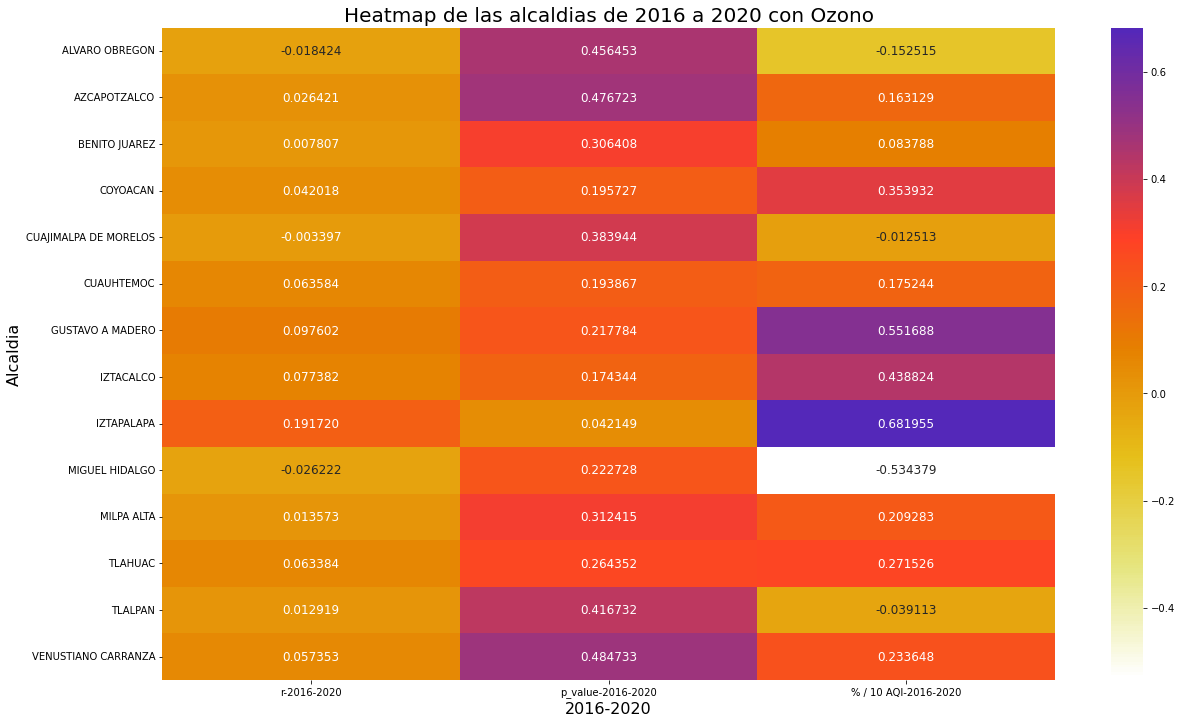

In [88]:
plt.figure(figsize = (20,12))

ax = sns.heatmap(df_pivot,  annot=True, fmt=".6f", annot_kws={"size":12},  cmap="CMRmap_r", center=0.29)

ax.set_xlabel('2016-2020', fontsize=16)
ax.set_ylabel('Alcaldia', fontsize=16)
ax.set_title('Heatmap de las alcaldias de 2016 a 2020 con Ozono', fontsize=20)



In [13]:
df_all_copy.loc[(df_all_copy['Anio'] == 2016) & (df_all_copy['Alcaldia_num'] == 1), 'r'] = 5

## Cada año, cada alcaldía

In [7]:
for i in df_all_copy['Alcaldia_num'].unique():
    for anio in df_all_copy['Anio'].unique():
        df_test = df_all_copy[(df_all_copy['Anio'] == anio) & (df_all_copy['Alcaldia_num'] == i)]
        df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)
        
        if(len(df_test.AQI) > 1):
            pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

            df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
            slope = df_all_fit[0]
            percentage = (slope*1000)/df_test["Crimenes"].max()

            r = round(pearson_coef, 6)
            p = round(p_value, 8)

            df_all_copy.loc[(df_all_copy['Anio'] == anio) & (df_all_copy['Alcaldia_num'] == i), 'r'] = r
            df_all_copy.loc[(df_all_copy['Anio'] == anio) & (df_all_copy['Alcaldia_num'] == i), 'p value'] = p
            df_all_copy.loc[(df_all_copy['Anio'] == anio) & (df_all_copy['Alcaldia_num'] == i), "% / 10 AQI"] = percentage

      
    

In [8]:
df_group_by = df_all_copy.groupby(['Alcaldia', 'Anio']).agg(r = ('r', 'mean'), p_value = ('p value', 'mean'), Percentage = ('% / 10 AQI', 'mean')).reset_index()
#df_group_by["Anio"] = "2016-2020"
df_group_by = df_group_by.rename(columns={"Percentage": "% / 10 AQI"})
df_group_by

,Alcaldia,Anio,r,p_value,% / 10 AQI
0,ALVARO OBREGON,2016,-0.008846,0.870712,-0.076448
1,ALVARO OBREGON,2017,-0.031301,0.562308,-0.319387
2,ALVARO OBREGON,2018,-0.031191,0.572934,-0.269619
3,ALVARO OBREGON,2019,0.066424,0.212501,0.331464
4,ALVARO OBREGON,2020,-0.085980,0.100994,-0.429676
...,...,...,...,...,...
65,VENUSTIANO CARRANZA,2016,0.032239,0.544881,0.130429
66,VENUSTIANO CARRANZA,2017,0.104800,0.051113,0.380438
67,VENUSTIANO CARRANZA,2018,-0.001754,0.973575,-0.005325
68,VENUSTIANO CARRANZA,2019,-0.012283,0.815335,-0.054356


In [100]:
df_group_by[df_group_by["Alcaldia"] == "COYOACAN"]

,Alcaldia,Anio,r,p_value,% / 10 AQI,%_cat,%_cat_2,p_value_cat,p_value_cat_2
15,COYOACAN,2016,0.21894100,0.00002509,2.00755672,NaN,NaN,0 - 0.1,2
16,COYOACAN,2017,-0.06471800,0.21994989,-0.72051840,-4 - 0,-1,0.1 - 0.4,1
17,COYOACAN,2018,0.10168100,0.05631630,1.05117383,1 - 2,2,0 - 0.1,2
18,COYOACAN,2019,0.03142900,0.55003579,0.26906455,0 - 0.6,0,0.4 - 0.65,0
19,COYOACAN,2020,-0.07566600,0.14854068,-0.81894690,-4 - 0,-1,0.1 - 0.4,1


In [9]:
df_group_by["r_cat"] = 0
df_group_by["p_value_cat"] = 0
df_group_by["%_cat"] = 0

In [10]:
categories = [math.floor(df_group_by["% / 10 AQI"].min()), 0, 0.6, 1, math.ceil(df_group_by["% / 10 AQI"].max())]
labels = ["{0} - {1}".format(categories[i], categories[i+1]) for i in range(len(categories)-1)]
labels2 = [-1, 0, 1, 2]
labels

['-4 - 0', '0 - 0.6', '0.6 - 1', '1 - 3']

In [11]:
categories_p = [0, 0.1, 0.4, 0.65, 1]
labels_p = ["{0} - {1}".format(categories_p[i], categories_p[i+1]) for i in range(len(categories_p)-1)]
labels2_p = [2, 1, 0, -1]
labels_p

['0 - 0.1', '0.1 - 0.4', '0.4 - 0.65', '0.65 - 1']

In [12]:
categories_r = [math.floor(df_group_by["r"].min()), 0, 0.083, .17, math.ceil(df_group_by["r"].max())]
labels_r = ["{0} - {1}".format(categories_r[i], categories_r[i+1]) for i in range(len(categories_r)-1)]
labels2_r = [-1, 0, 1, 2]
labels_r

['-1 - 0', '0 - 0.083', '0.083 - 0.17', '0.17 - 1']

In [13]:
df_group_by["%_cat"] = pd.cut(df_group_by['% / 10 AQI'], bins=categories, right=False, labels=labels)
df_group_by["%_cat_2"] = pd.cut(df_group_by['% / 10 AQI'], bins=categories, right=False, labels=labels2)

df_group_by["p_value_cat"] = pd.cut(df_group_by['p_value'], bins=categories_p, right=False, labels=labels_p)
df_group_by["p_value_cat_2"] = pd.cut(df_group_by['p_value'], bins=categories_p, right=False, labels=labels2_p)

df_group_by["r_cat"] = pd.cut(df_group_by['r'], bins=categories_r, right=False, labels=labels_r)
df_group_by["r_cat_2"] = pd.cut(df_group_by['r'], bins=categories_r, right=False, labels=labels2_r)

In [14]:
df_group_by

,Alcaldia,Anio,r,p_value,% / 10 AQI,r_cat,p_value_cat,%_cat,%_cat_2,p_value_cat_2,r_cat_2
0,ALVARO OBREGON,2016,-0.008846,0.870712,-0.076448,-1 - 0,0.65 - 1,-4 - 0,-1,-1,-1
1,ALVARO OBREGON,2017,-0.031301,0.562308,-0.319387,-1 - 0,0.4 - 0.65,-4 - 0,-1,0,-1
2,ALVARO OBREGON,2018,-0.031191,0.572934,-0.269619,-1 - 0,0.4 - 0.65,-4 - 0,-1,0,-1
3,ALVARO OBREGON,2019,0.066424,0.212501,0.331464,0 - 0.083,0.1 - 0.4,0 - 0.6,0,1,0
4,ALVARO OBREGON,2020,-0.085980,0.100994,-0.429676,-1 - 0,0.1 - 0.4,-4 - 0,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
65,VENUSTIANO CARRANZA,2016,0.032239,0.544881,0.130429,0 - 0.083,0.4 - 0.65,0 - 0.6,0,0,0
66,VENUSTIANO CARRANZA,2017,0.104800,0.051113,0.380438,0.083 - 0.17,0 - 0.1,0 - 0.6,0,2,1
67,VENUSTIANO CARRANZA,2018,-0.001754,0.973575,-0.005325,-1 - 0,0.65 - 1,-4 - 0,-1,-1,-1
68,VENUSTIANO CARRANZA,2019,-0.012283,0.815335,-0.054356,-1 - 0,0.65 - 1,-4 - 0,-1,-1,-1


In [148]:
df_group_by["%_cat"].value_counts()

0 - 0.6    30
-4 - 0     25
0.6 - 1     8
1 - 3       7
Name: %_cat, dtype: int64

In [15]:
from pathlib import Path  
filepath = Path('../CSV_limpios/relation_cat_Ozono.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df_group_by.to_csv(filepath) 

In [116]:
df_pivot = df_group_by.pivot(index='Alcaldia', columns='Anio', values=['r_cat_2', 'p_value_cat_2', "%_cat_2"])
df_pivot

r_cat_2                     p_value_cat_2            \
Anio                     2016 2017 2018 2019 2020          2016 2017 2018   
Alcaldia                                                                    
ALVARO OBREGON             -1   -1   -1    0   -1            -1    0    0   
AZCAPOTZALCO               -1   -1    0    0    1             0    0   -1   
BENITO JUAREZ               0   -1    0   -1    1             1    0    0   
COYOACAN                    2   -1    1    0   -1             2    1    2   
CUAJIMALPA DE MORELOS       0   -1   -1    0    0             1    2    0   
CUAUHTEMOC                  1    0   -1    2   -1             2    1    0   
GUSTAVO A MADERO            1   -1    0    1    2             2    0    0   
IZTACALCO                   1   -1    0    2    1             2    2   -1   
IZTAPALAPA                  0    1    2    2    2             1    2    2   
MIGUEL HIDALGO              0   -1    0    2   -1             1    2   -1   
MILPA ALTA                 -1   -1    0    1   -1             1    1    0   
TLAHUAC                     0    0    1   -1    1             1    1    2   
TLALPAN                     0    1    0    0   -1             1    1   -1   
VENUSTIANO CARRANZA         0    1   -1   -1    2             0    2   -1   

                                %_cat_2                      
Anio                  2019 2020    2016 2017 2018 2019 2020  
Alcaldia                                                     
ALVARO OBREGON           1    1      -1   -1   -1    0   -1  
AZCAPOTZALCO             1    2      -1   -1    0    0    0  
BENITO JUAREZ            2    2       0   -1    0   -1    1  
COYOACAN                 0    1       2   -1    2    0   -1  
CUAJIMALPA DE MORELOS    1   -1       0   -1   -1    0    0  
CUAUHTEMOC               2    1       0    0   -1    1   -1  
GUSTAVO A MADERO         2    2       2   -1    0    0    2  
IZTACALCO                2    2       0   -1    0    2    2  
IZTAPALAPA               2    2       0    1    0    1    1  
MIGUEL HIDALGO           2    2       0   -1    0    1   -1  
MILPA ALTA               2    0      -1   -1    0    2   -1  
TLAHUAC                  0    2       0    0    0   -1    0  
TLALPAN                 -1    2       0    1    0    0   -1  
VENUSTIANO CARRANZA     -1    2       0    0   -1   -1    1

Text(0.5, 1.0, 'Heatmap de cada alcaldia de 2016 a 2020 con Ozono')

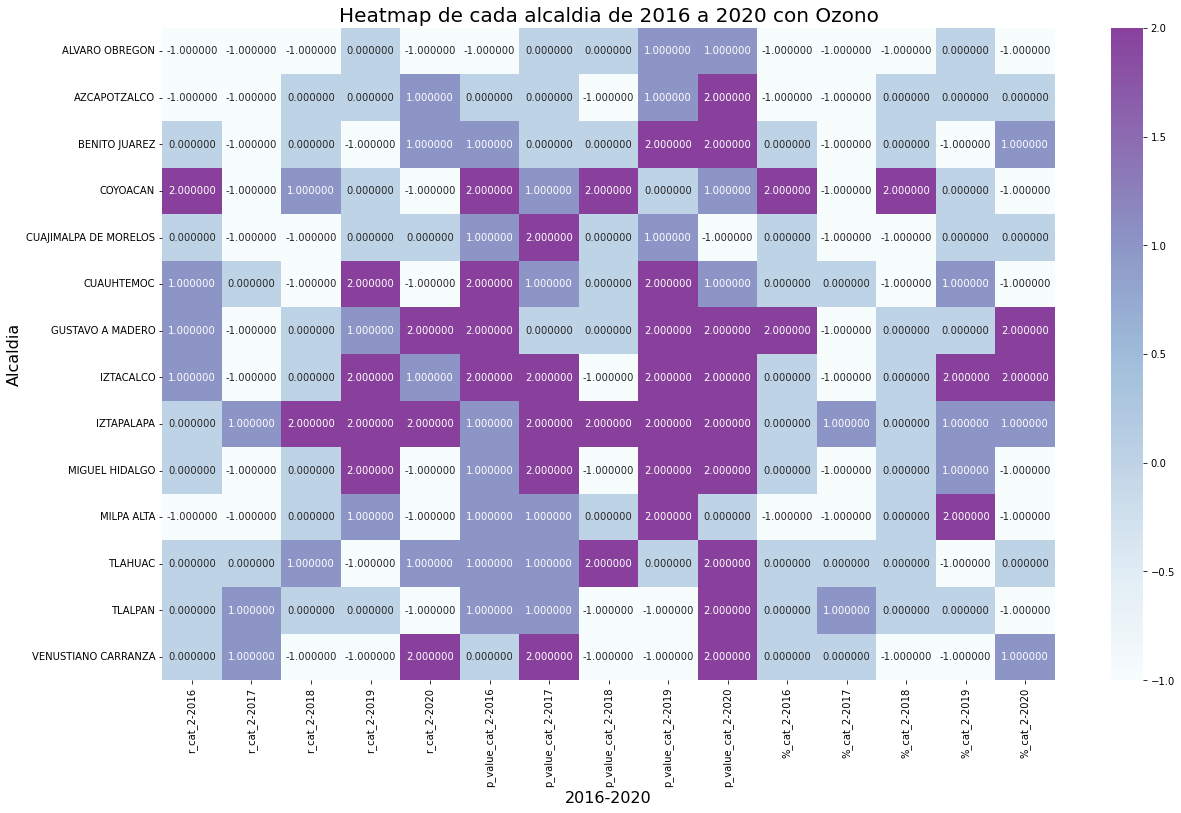

In [145]:
plt.figure(figsize = (20,12))

ax = sns.heatmap(df_pivot,  annot=True, fmt=".6f", annot_kws={"size":10}, cmap="BuPu", center=1, linewidths=0)


ax.set_xlabel('2016-2020', fontsize=16)
ax.set_ylabel('Alcaldia', fontsize=16)
ax.set_title('Heatmap de cada alcaldia de 2016 a 2020 con Ozono', fontsize=20)


Text(0.5, 1.0, 'Heatmap de cada alcaldia de 2016 a 2020 con Ozono')

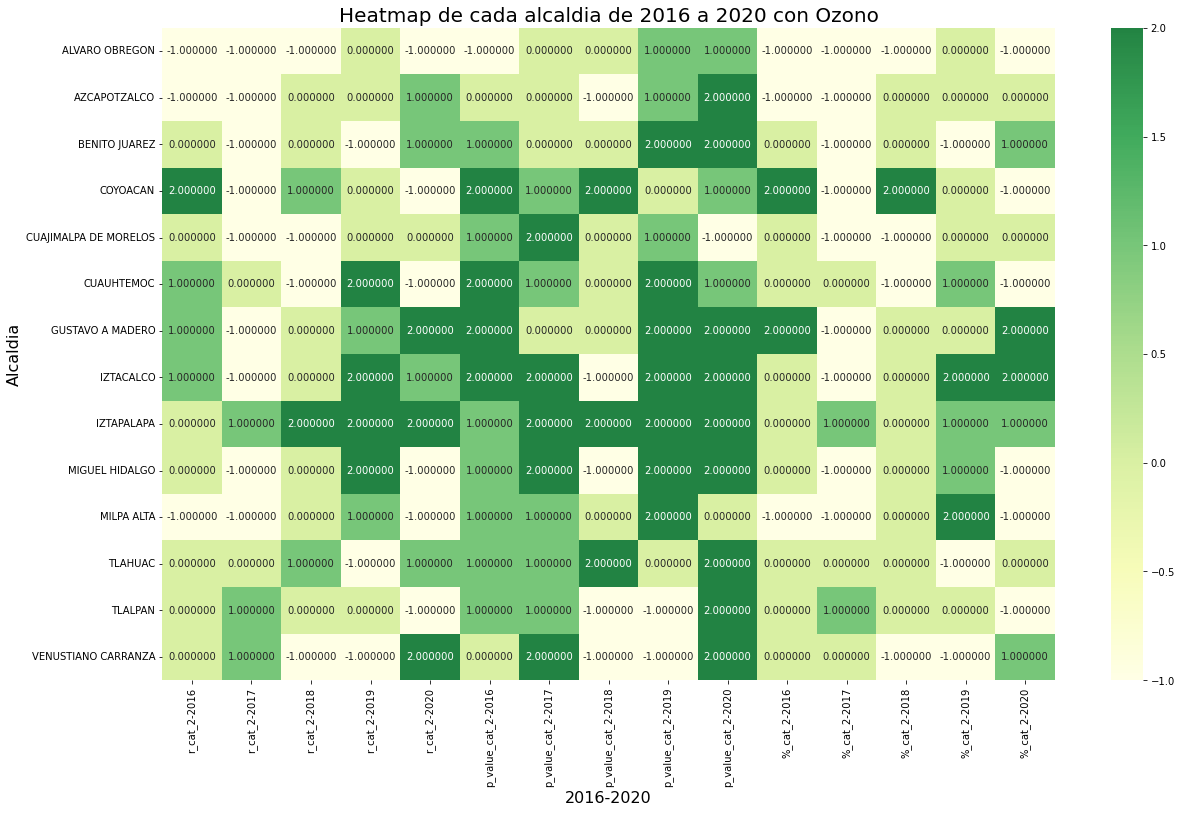

In [146]:
plt.figure(figsize = (20,12))

ax = sns.heatmap(df_pivot,  annot=True, fmt=".6f", annot_kws={"size":10}, cmap="YlGn", center=1, linewidths=0)


ax.set_xlabel('2016-2020', fontsize=16)
ax.set_ylabel('Alcaldia', fontsize=16)
ax.set_title('Heatmap de cada alcaldia de 2016 a 2020 con Ozono', fontsize=20)

## Todas las alcaldias en todos meses de todos los años

In [30]:
for Alcaldia in df_all_copy['Alcaldia_num'].unique():
    for anio in df_all_copy['Anio'].unique():
        for mes in df_all_copy['Mes'].unique():
            df_test = df_all_copy[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes)]
            df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)

            if(len(df_test.AQI) > 1):
                pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

                df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
                slope = df_all_fit[0]
                percentage = (slope*1000)/df_test["Crimenes"].max()

                r = round(pearson_coef, 6)
                p = round(p_value, 8)

                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), 'r'] = r
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), 'p value'] = p
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), "% / 10 AQI"] = percentage

      
    

In [32]:
mes_mapper = {1: 1,
              2: 1,
              3: 2,
              4: 2,
              5: 3,
              6: 3,
              7: 4,
              8: 4,
              9: 5,
              10: 5,
              11: 6,
              12: 6}
df_all_copy['Semestre'] = df_all_copy['Mes'].replace(mes_mapper)

In [37]:
df_all_copy

,ID,Dia,Mes,Anio,Alcaldia,Latitud,Longitud,Crimenes,AQI,Alcaldia_num,r,p value,% / 10 AQI,Semestre
0,1_1_2016_ALVAR,1,1,2016,ALVARO OBREGON,19.32514572,-99.20413971,5,53,11,-0.18166700,0.32803239,-2.36269674,1
1,1_1_2016_AZCAP,1,1,2016,AZCAPOTZALCO,19.46840477,-99.16979218,4,207,7,-0.01251700,0.94671763,-0.04156783,1
2,1_1_2016_BENIT,1,1,2016,BENITO JUAREZ,19.37046432,-99.15959930,4,184,1,-0.27704300,0.14568249,-1.81583336,1
3,1_1_2016_COYOA,1,1,2016,COYOACAN,19.30444145,-99.10363007,6,43,14,-0.04424700,0.81640866,-0.69427833,1
4,1_1_2016_CUAJI,1,1,2016,CUAJIMALPA DE MORELOS,19.36531258,-99.29170227,5,171,5,0.52768700,0.01679172,4.22435347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22438,31_12_2020_IZTAP,31,12,2020,IZTAPALAPA,19.34560966,-99.00938416,15,25,10,-0.09397100,0.61508864,-2.28774643,6
22439,31_12_2020_MIGUE,31,12,2020,MIGUEL HIDALGO,19.40405083,-99.20265961,3,20,9,0.03996500,0.83096909,0.98086558,6
22440,31_12_2020_TLAHU,31,12,2020,TLAHUAC,19.24645805,-99.01056671,3,35,6,0.09270200,0.61989387,0.85127556,6
22441,31_12_2020_TLALP,31,12,2020,TLALPAN,19.15428543,-99.16261292,4,27,4,0.03343300,0.85829221,0.92230576,6


In [34]:
df_alcaldia = df_all_copy.loc[(df_all_copy['Alcaldia_num'] == 1)]
df_group_by = df_alcaldia.groupby(['Anio', 'Mes']).agg(r = ('r', 'mean'), p_value = ('p value', 'mean'), Percentage = ('% / 10 AQI', 'mean')).reset_index()
#df_group_by["Anio"] = "2016-2020"
df_group_by = df_group_by.rename(columns={"Percentage": "% / 10 AQI"})

In [114]:
mes_mapper = {1: "Enero",
              2: "Febrero",
              3: "Marzo",
              4: "Abril",
              5: "Mayo",
              6: "Junio",
              7: "Julio",
              8: "Agosto",
              9: "Septiembre",
              10: "Octubre",
              11: "Noviembre",
              12: "Diciembre"}

alc_mapper = {"BENITO JUAREZ": 1,
              "VENUSTIANO CARRANZA": 2,
              "IZTACALCO": 3,
              "TLALPAN": 4,
              "CUAJIMALPA DE MORELOS": 5,
              "TLAHUAC": 6,
              "AZCAPOTZALCO": 7,
              "CUAUHTEMOC": 8,
              "MIGUEL HIDALGO": 9,
              "IZTAPALAPA": 10,
              "ALVARO OBREGON": 11,
              "GUSTAVO A MADERO": 12,
              "MILPA ALTA": 13,
              "COYOACAN":14}

In [288]:
df_pivot = df_group_by.pivot(index='Mes', columns='Anio', values=['r', 'p_value', "% / 10 AQI"])

Text(0.5, 1.0, 'Heatmap de BENITO JUAREZ de 2016 a 2019 con Ozono')

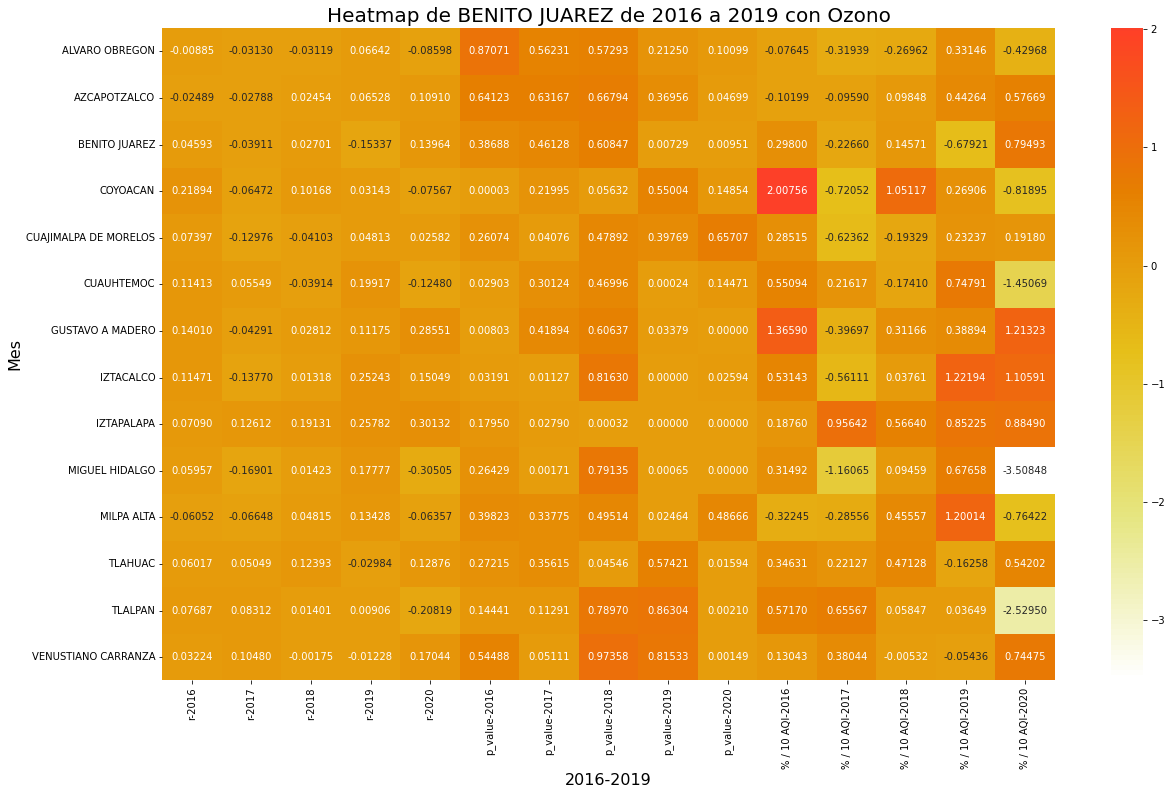

In [36]:
plt.figure(figsize = (20,12))

ax = sns.heatmap(df_pivot,  annot=True, fmt=".5f", annot_kws={"size":10}, cmap="CMRmap_r", center=2)


ax.set_xlabel('2016-2019', fontsize=16)

ax.set_ylabel('Mes', fontsize=16)
ax.set_title('Heatmap de BENITO JUAREZ de 2016 a 2019 con Ozono', fontsize=20)


## Meses del 2017 en las Alcaldias

In [58]:
df_alcaldia = df_all_copy.loc[(df_all_copy['Anio'] == 2020)]
df_group_by = df_alcaldia.groupby(['Alcaldia', 'Semestre']).agg(r = ('r', 'mean'), p_value = ('p value', 'mean'), Percentage = ('% / 10 AQI', 'mean')).reset_index()
#df_group_by["Anio"] = "2016-2020"
df_group_by = df_group_by.rename(columns={"Percentage": "% / 10 AQI"})

In [59]:
df_pivot = df_group_by.pivot(index='Alcaldia', columns='Semestre', values=['r', 'p_value', "% / 10 AQI"])
#df_pivot

Text(0.5, 1.0, 'Heatmap de las alcaldias por semestres del 2020 con Ozono')

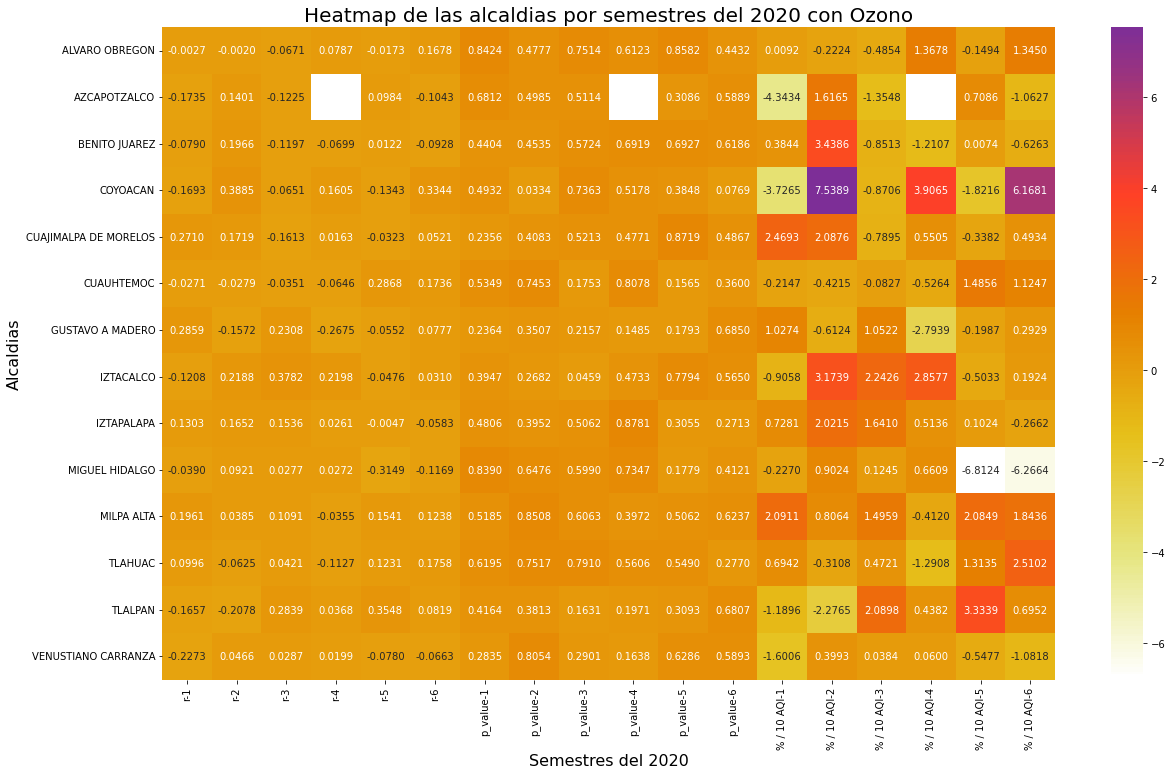

In [66]:
plt.figure(figsize = (20,12))

ax = sns.heatmap(df_pivot,  annot=True, fmt=".4f", annot_kws={"size":10}, cmap="CMRmap_r", center=3.9)


ax.set_xlabel('Semestres del 2020', fontsize=16)

ax.set_ylabel('Alcaldias', fontsize=16)
ax.set_title('Heatmap de las alcaldias por semestres del 2020 con Ozono', fontsize=20)